In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
# Load the data from the CSV file
data = pd.read_csv('../data/data.csv')

In [3]:
# Convert TransactionStartTime to datetime with timezone information
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime']).dt.tz_localize(None)

In [4]:
data['TransactionId'] = data['TransactionId'].str.extract('(\d+)') # Extract only numeric part
data['BatchId'] = data['BatchId'].str.extract('(\d+)') # Extract only numeric part
data['AccountId'] = data['AccountId'].str.extract('(\d+)') # Extract only numeric part
data['SubscriptionId'] = data['SubscriptionId'].str.extract('(\d+)') # Extract only numeric part
data['CustomerId'] = data['CustomerId'].str.extract('(\d+)') # Extract only numeric part
data['ProviderId'] = data['ProviderId'].str.extract('(\d+)') # Extract only numeric part
data['ProductId'] = data['ProductId'].str.extract('(\d+)') # Extract only numeric part
data['ChannelId'] = data['ChannelId'].str.extract('(\d+)') # Extract only numeric part


In [5]:
# Extract RFMS features
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
today = pd.to_datetime('today')
data['Recency'] = (today - data['TransactionStartTime']).dt.days
data['Frequency'] = data.groupby('CustomerId')['CustomerId'].transform('count')
data['Monetary'] = np.abs(data['Amount'])

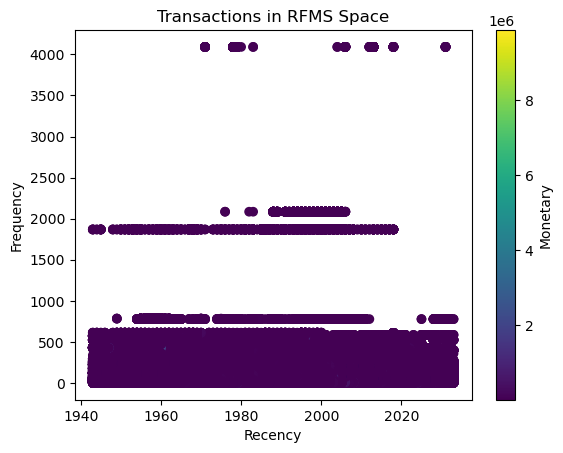

In [6]:
# Visualize transactions in RFMS space
plt.scatter(data['Recency'], data['Frequency'], c=data['Monetary'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Transactions in RFMS Space')
plt.colorbar(label='Monetary')
plt.show()

In [7]:
# Construct a default estimator (proxy)
estimator = IsolationForest()

In [8]:
# Fit the estimator to RFMS features
X = data[['Recency', 'Frequency', 'Monetary']]
estimator.fit(X)


IsolationForest()

In [9]:
# Set a boundary to classify users as high and low RFMS scores
boundary = -0.5  # Adjust the boundary value based on the visualization and desired classification


In [10]:
# Classify transactions based on RFMS scores
predictions = estimator.predict(X)
data['RFMS'] = np.where(predictions < boundary, 'High', 'Low')


In [11]:
# Print the RFMS classification
print(data[['TransactionId', 'RFMS']])

      TransactionId  RFMS
0             76871  High
1             73770  High
2             26203  High
3               380  High
4             28195  High
...             ...   ...
95657         89881   Low
95658         91597   Low
95659         82501   Low
95660        136354  High
95661         35670   Low

[95662 rows x 2 columns]


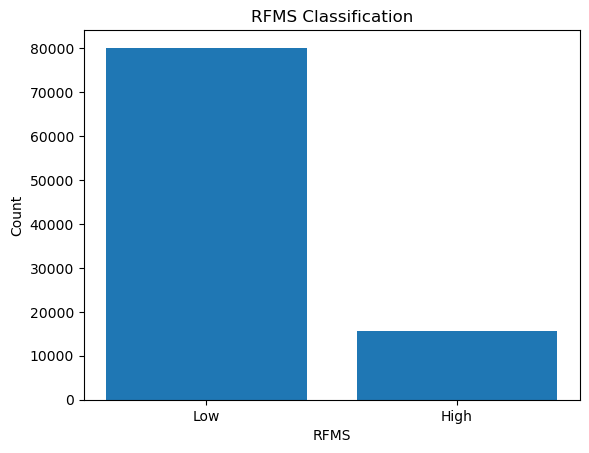

In [12]:
# Print the RFMS classification
rfms_counts = data['RFMS'].value_counts()

# Plot the RFMS classification
plt.bar(rfms_counts.index, rfms_counts.values)
plt.xlabel('RFMS')
plt.ylabel('Count')
plt.title('RFMS Classification')
plt.show()

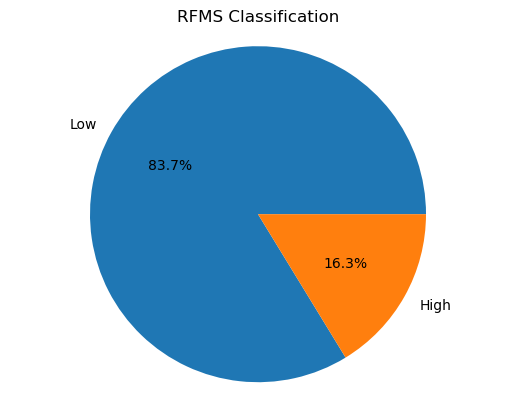

In [13]:
# Plot the RFMS classification using a pie chart
plt.pie(rfms_counts.values, labels=rfms_counts.index, autopct='%1.1f%%')
plt.title('RFMS Classification')
plt.axis('equal')
plt.show()